In [1]:
# -*- coding: utf-8 -*-
# 0. import needed pacakges
import os
import tensorflow as tf
tf.enable_eager_execution()
from yolo.net import Yolonet
from yolo.train import train
from yolo.dataset.generator import create_generator
from yolo import PROJECT_ROOT, COCO_ANCHORS

C:\Anaconda3\envs\yolov3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# 1. Define Parameters

# Pretrained weight file is at https://pjreddie.com/media/files/yolov3.weights
# Download darknet weight file and locate it to PROJECT ROOT
YOLOV3_WEIGHTS = os.path.join(PROJECT_ROOT, "yolov3.weights")
LABELS = ["1", "2", "3", "9"]

In [3]:
# 2. create model & load darknet pretrained weighted file
model = Yolonet(n_classes=len(LABELS))
model.load_darknet_params(YOLOV3_WEIGHTS, True)

62001757


In [4]:
# 3. create generator
ann_dir = os.path.join(PROJECT_ROOT, "samples", "svhn", "anns")
img_dir = os.path.join(PROJECT_ROOT, "samples", "svhn", "imgs")
generator = create_generator(img_dir, ann_dir,
                             batch_size=2,
                             labels_naming=LABELS)

# test generator
xs, ys_1, ys_2, ys_3 = generator[0]
print(xs.shape, ys_1.shape, ys_2.shape, ys_3.shape)

resizing:  288 288
(2, 288, 288, 3) (2, 9, 9, 3, 9) (2, 18, 18, 3, 9) (2, 36, 36, 3, 9)


In [5]:
# 4. define optimizer    
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)


In [6]:
# 5. train model using tf-eager
train(generator, optimizer, model, num_epoches=35, verbose=1, fname="svhn")

resizing:  288 288
0-th loss = 23.279640197753906
    update weight 23.279640197753906
1-th loss = 13.958720207214355
    update weight 13.958720207214355
2-th loss = 13.110837936401367
    update weight 13.110837936401367
3-th loss = 8.480728149414062
    update weight 8.480728149414062
4-th loss = 7.2480244636535645
    update weight 7.2480244636535645
5-th loss = 5.873476505279541
    update weight 5.873476505279541
6-th loss = 5.132544994354248
    update weight 5.132544994354248
7-th loss = 4.773722171783447
    update weight 4.773722171783447
8-th loss = 4.285079479217529
    update weight 4.285079479217529
9-th loss = 3.7717859745025635
    update weight 3.7717859745025635
resizing:  288 288
10-th loss = 3.559093475341797
    update weight 3.559093475341797
11-th loss = 3.027839183807373
    update weight 3.027839183807373
12-th loss = 3.09367036819458
13-th loss = 2.7316019535064697
    update weight 2.7316019535064697
14-th loss = 2.3730015754699707
    update weight 2.3730015

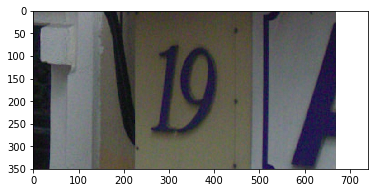

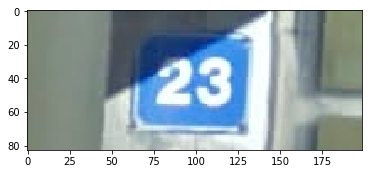

In [4]:
# 6. Load test images
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(PROJECT_ROOT, "samples", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

1: 84.32703614234924%
9: 90.85809588432312%


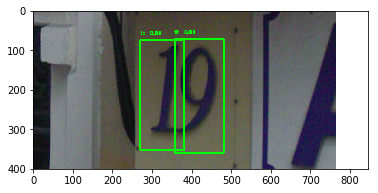

3: 78.34210991859436%
2: 81.33814930915833%


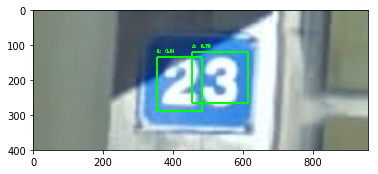

In [7]:
# 7. predict 
from yolo.frontend import YoloDetector
from yolo.utils.box import draw_boxes
import cv2

model.load_weights("svhn.h5")
detector = YoloDetector(model)

for img in imgs:
    boxes = detector.detect(img, COCO_ANCHORS)
    image = draw_boxes(img, boxes, labels=LABELS, desired_size=400)
    plt.imshow(image)
    plt.show()


